In [1]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import pandas as pd
from sklearn.metrics import roc_curve
import seaborn as sns
import os

TF_list = ["CTCF",
"EBF1",
"SP1",
"PU1",
"RUNX3",
"NFYB",
"Nrf1",
"ELF1",
"NFKB",
"TCF3",
"Mxi1",
"USF1",
"YY1",
"USF2",
"ZEB1",
"PAX5",
"POU2F2",
"NRSF",
"PBX3",
"MEF2A",
"E2F4",
"BHLHE40",
"ELK1",
"NFIC",
"MEF2C",
"Max",
"SRF",
"Znf143",
"IRF4",
"ZBTB33",
"NFYA",
"ETS1",
"RFX5",
"STAT3",
"JunD",
"CEBPB",
"STAT1",
"FOS"]

Populating the interactive namespace from numpy and matplotlib


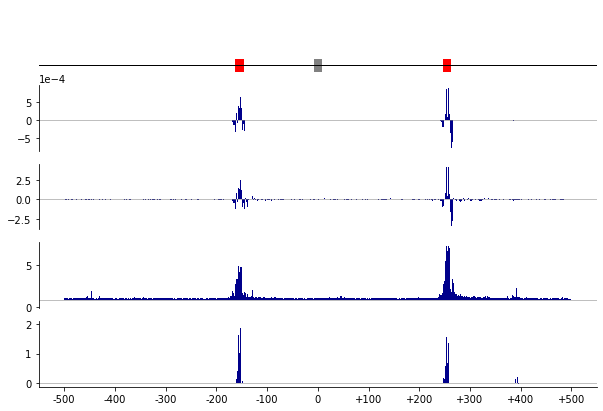

In [2]:
exnum = 89
gcfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results_new/gcam/c/simulated-TAL1/weight_figures/vis-sample-%s.txt"%exnum
gcam = [float(item.strip().split()[1]) for item in open(gcfile_ex, "r").readlines()]

smfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results_new/reg/c/simulated-TAL1/weight_figures/vis-sample-%s.txt"%exnum
sm = [float(item.strip().split()[1]) for item in open(smfile_ex, "r").readlines()]

mutfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results_new/prtb/c/simulated-TAL1/weight_figures/vis-sample-%s.txt"%exnum
mut = [float(item.strip().split()[1])-0.90 for item in open(mutfile_ex, "r").readlines()]

dlfile_ex = "/storage/pandaman/project/AgentBind-Simulation/results/deeplift/c/rescale_conv_revealcancel_fc/weight_figures/vis-sample-%s.txt"%exnum
dl = [float(item.strip().split()[1]) for item in open(dlfile_ex, "r").readlines()]

sval = 1
color = "darkblue"

xvals = range(len(gcam))
motif_pos = [1 if ((idx>=338 and idx<354) or (idx>=748 and idx<764)) else 0 for idx in xvals]
core_pos = [1 if ((idx>=492 and idx<508)) else 0 for idx in xvals]

fig = plt.figure()
fig.set_size_inches((10,7))

ax = fig.add_subplot(511)
ax.axhline(y=0.5, color="black", linewidth=1)
ax.bar(xvals, motif_pos, color="red", width=1)
ax.bar(xvals, core_pos, color="grey", width=1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim(bottom=0, top=5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = fig.add_subplot(512)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
ax.bar(xvals, gcam, color=color, width=1)
ax.set_xticks([])
#ax.set_yticks(np.arange(-0.05, 0.11, 0.05))
ax.axhline(y=0, color="gray", linewidth=0.5)
#ax.set_ylim(bottom=-0.0009, top=0.001)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = fig.add_subplot(513)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
ax.bar(xvals, sm, color=color,  width=1)
ax.set_xticks([])
ax.axhline(y=0, color="gray", linewidth=0.5)
#ax.set_yticks(np.arange(-0.05, 0.06, 0.05))
#ax.set_ylim(bottom=-3, top=4.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = fig.add_subplot(514)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
ax.bar(xvals, mut, color=color,  width=1, bottom=0.90)
#ax.set_yticks(np.arange(0, 0.021, 0.01))
ax.set_xticks([])
ax.axhline(y=0.90, color="gray", linewidth=0.5)
ax.set_ylim(bottom=-0.1, top=7.6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = fig.add_subplot(515)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
ax.bar(xvals, dl, color=color, width=1)
#ax.set_yticks(np.arange(0, 0.021, 0.01))
ax.set_xticks(np.arange(0, 1001, 100))
ax.set_xticklabels(list(np.arange(-500, 1, 100)) + ["+%s"%item for item in np.arange(100, 501, 100)])
ax.axhline(y=0, color="gray", linewidth=0.5)
#ax.set_ylim(bottom=-0.1, top=2.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


fig.savefig("AgentBind_Figure2b_sim.pdf")